# Visualizing NYC Crash Data

Presentation By:
- Taelor McClurg
- Sinchan Sharma

One question that comes to mind is: "how often do crashes in the data set involve fatalities, and if so, how many fatalities?" We start by creating some simple bar charts to get an idea about this.

<AxesSubplot:xlabel='NUMBER OF PERSONS KILLED', ylabel='count'>

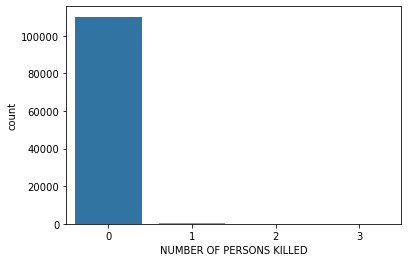

In [2]:
import pandas as pd
import seaborn as sns

nyc_crash = pd.read_csv("nyc_mv_crash_2021.csv")
sns.countplot(x ='NUMBER OF PERSONS KILLED', data = nyc_crash)

We see that the vast majority of collisions in the data set didn't involve any fatalities, and almost no collusions involved more than one.

Next, let's make similar plots showing the distribution of injuries:

<AxesSubplot:xlabel='NUMBER OF PERSONS INJURED', ylabel='count'>

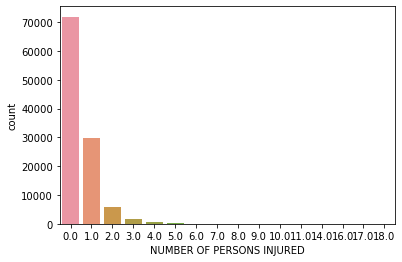

In [3]:
sns.countplot(x ='NUMBER OF PERSONS INJURED', data = nyc_crash)

We observe that majority of crashes involved know injuries, and the number of injuries drops off pretty steeply.

Another plausible question is: do some buroughs have more crashes than others?

<AxesSubplot:xlabel='BOROUGH', ylabel='count'>

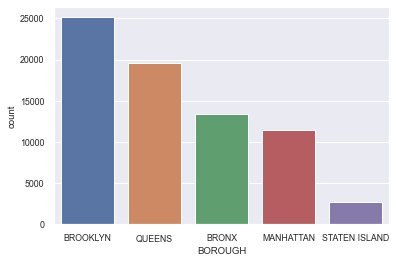

In [4]:
sns.set(font_scale=.8)
sns.countplot(x ='BOROUGH', data = nyc_crash)

Here, we create a map showing the locations of all crashes in the dataset.

<GeoAxesSubplot:title={'center':'Crashes in New York City'}, xlabel='LONGITUDE', ylabel='LATITUDE'>

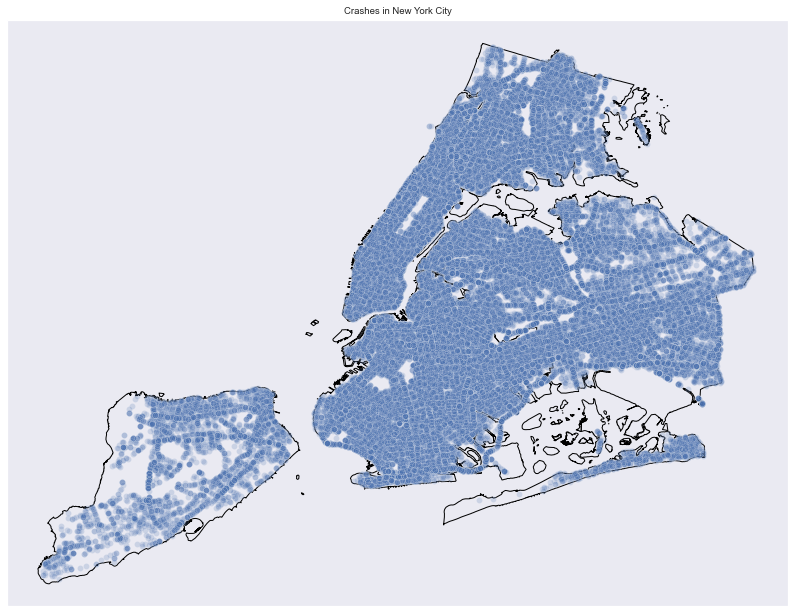

In [5]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np

nyc_crash[nyc_crash.LONGITUDE == 0] = np.nan

reader = shpreader.Reader('nyc_shape/geo_export_a1f96cd2-7ce6-44bb-9568-f3ee8bcba44a.dbf')
geom = list(reader.geometries())
GEOM = cfeature.ShapelyFeature(geom, ccrs.PlateCarree())
plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
plt.title("Crashes in New York City")
m.add_feature(GEOM, facecolor='none', edgecolor='black')
sns.scatterplot(x="LONGITUDE", y="LATITUDE", data=nyc_crash,
               alpha=.2)

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import *

nyc_crash_2021 = pd.read_csv('nyc_mv_crash_2021.csv')

## Create additional variables we're interested in visualizing
nyc_crash_2021['CRASH DATE'] = pd.to_datetime(nyc_crash_2021['CRASH DATE'])

## Create vaviable 'Month'
nyc_crash_2021['Month'] = nyc_crash_2021['CRASH DATE'].dt.strftime('%b')

def season(x):
    if x in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif x in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif x in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Fall'

## Create variables 'Season' and 'Hour'
nyc_crash_2021['Season'] = nyc_crash_2021['Month'].apply(season)

## 'Hour' variable is in military time (0 through 23)
nyc_crash_2021['Hour'] = [int(x.split(':')[0]) for x in nyc_crash_2021['CRASH TIME']]

When it comes to motor vehicle crashes in New York, one question that comes to mind is: 

"How many crashes in the dataset take place during different times of the year, particularly in different seasons?"

To answer this, we can create a simple countplot showing the frequency of crashes that take place in different seasons.

Text(0.5, 1.0, 'NYC Motor Vehicle Crashes for Each Season')

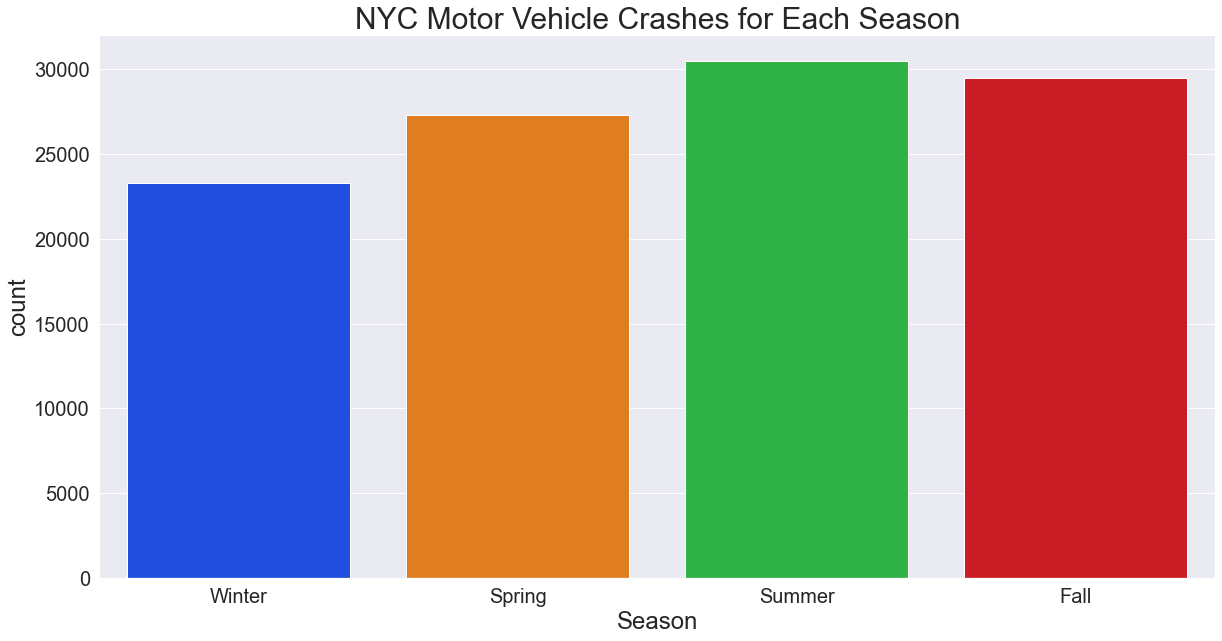

In [7]:
plt.figure(figsize = (20, 10))
sns.set_theme(style = 'darkgrid', palette = 'bright', rc = 
              {"axes.labelsize": 24, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

sns.countplot(x = 'Season', data = nyc_crash_2021)
plt.title('NYC Motor Vehicle Crashes for Each Season', fontsize = 30)

Here we observe that the most crashes take place during the summer months, and the least crashes occur during the winter
months. Overall, there doesn't appear to be a massive difference in the number of crashes for any of the seasons.

Now let's create a similar plot, but split the number of crashes in each season by the borough in which the crash took place.

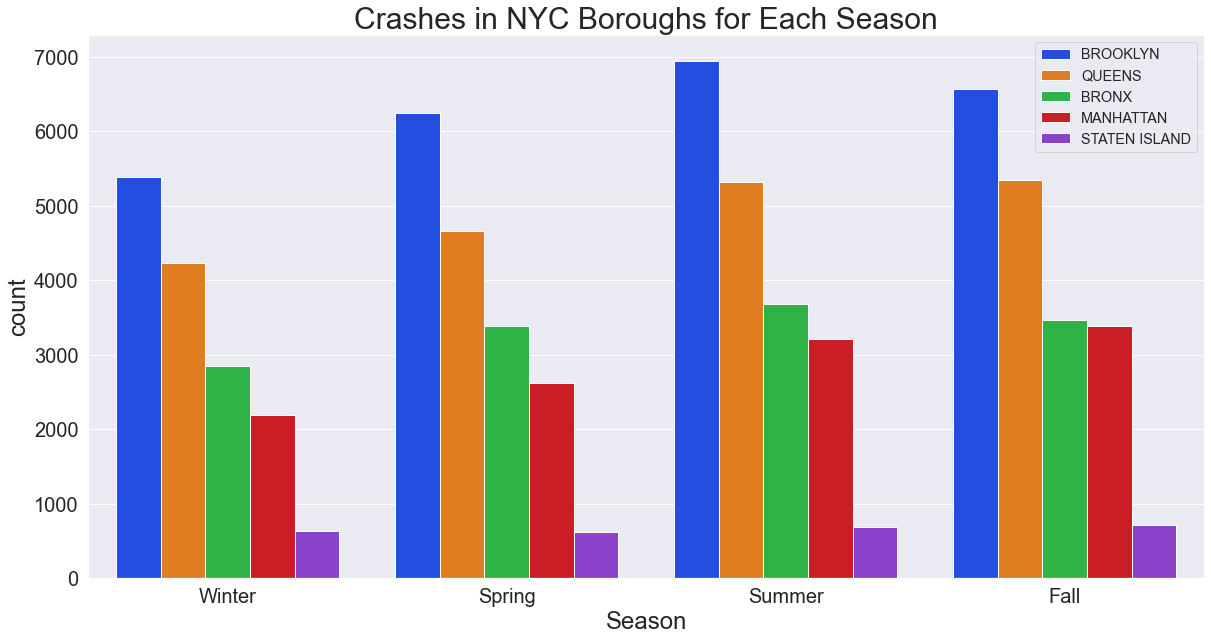

In [8]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'Season', data = nyc_crash_2021, hue = 'BOROUGH')
plt.title('Crashes in NYC Boroughs for Each Season', fontsize = 30)
plt.legend(fontsize = 'large')

We can see that regardless of season, Brooklyn has the most vehicle crashes, while Staten Island has by far the least. 
We can also see that the number of crashes in general increases from spring to summer, and then begins to decrease as we 
transition to the colder fall and winter months.

Another question worth investigating is how the number of crashes that occur each hour vary by different boroughs as well as 
different seasons. We can create multiple histograms to show the distribution of crashes by hour for different boroughs and
seasons.

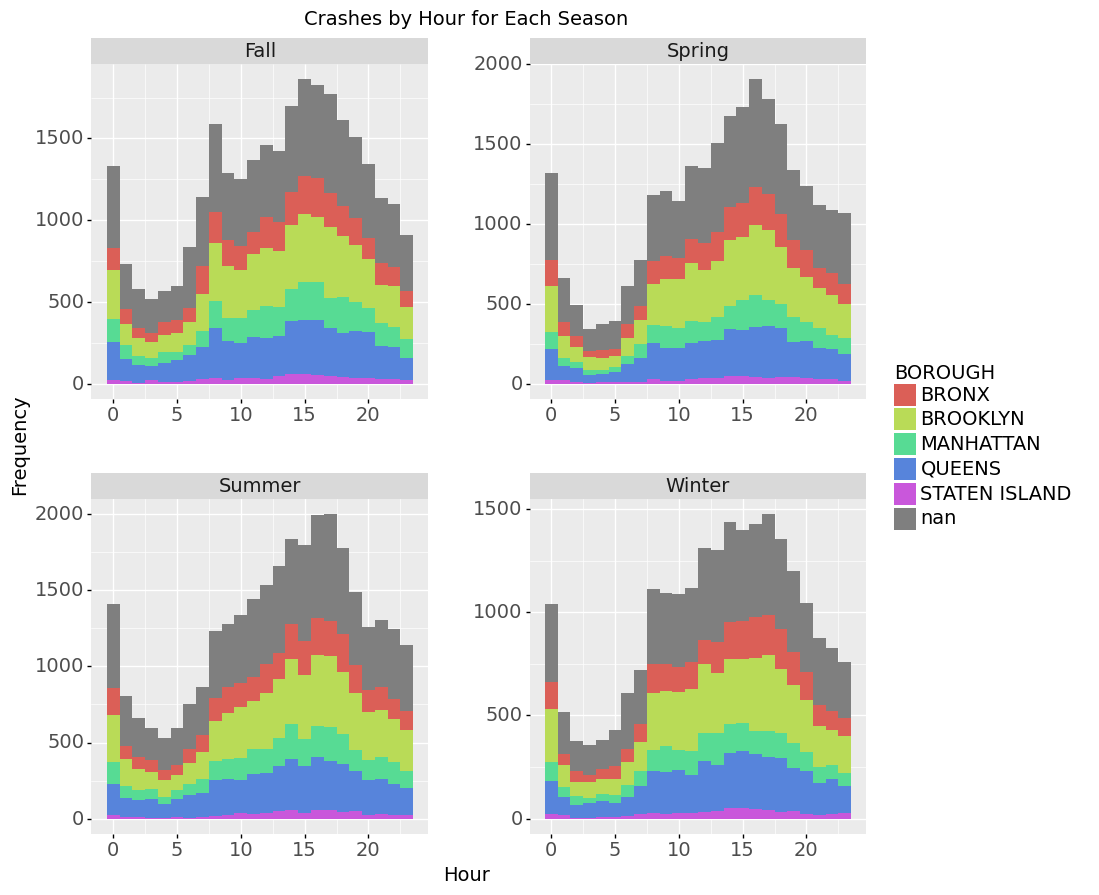

<ggplot: (299234741)>

In [9]:
(
    ggplot(nyc_crash_2021, aes(x = 'Hour', y = after_stat('count'), fill = 'BOROUGH'))
    + geom_histogram(binwidth = 1, bins = 24)
    + facet_wrap('Season', scales = 'free')
    + ggtitle('Crashes by Hour for Each Season')
    + labs(x = 'Hour', y = 'Frequency')
    + theme(subplots_adjust = {'wspace': 0.3, 'hspace': 0.3}, figure_size = (10, 10), 
            text = element_text(size = 14))
)

From out histograms above, we can see that the overall distribution of crashes by hour is pretty much the same over the 
different seasons of the year. It seems that the fewest crashes occur in the hours during the middle of the night and early 
morning (1AM through 7AM). On the other hand, most crashes seem to take place between the middle of the afternoon until the 
early evening (around 2PM through 6PM). 

If we look at the crashes by hour for each borough, there doesn't appear to be any noticable differences in the number of
crashes for any specific borough across different seasons, although there appear to be many crashes in which the borough 
where it took place is unknown.

Next, we create a map showing the locations of different of all crashes in the dataset by time of day, divided into three hour windows.

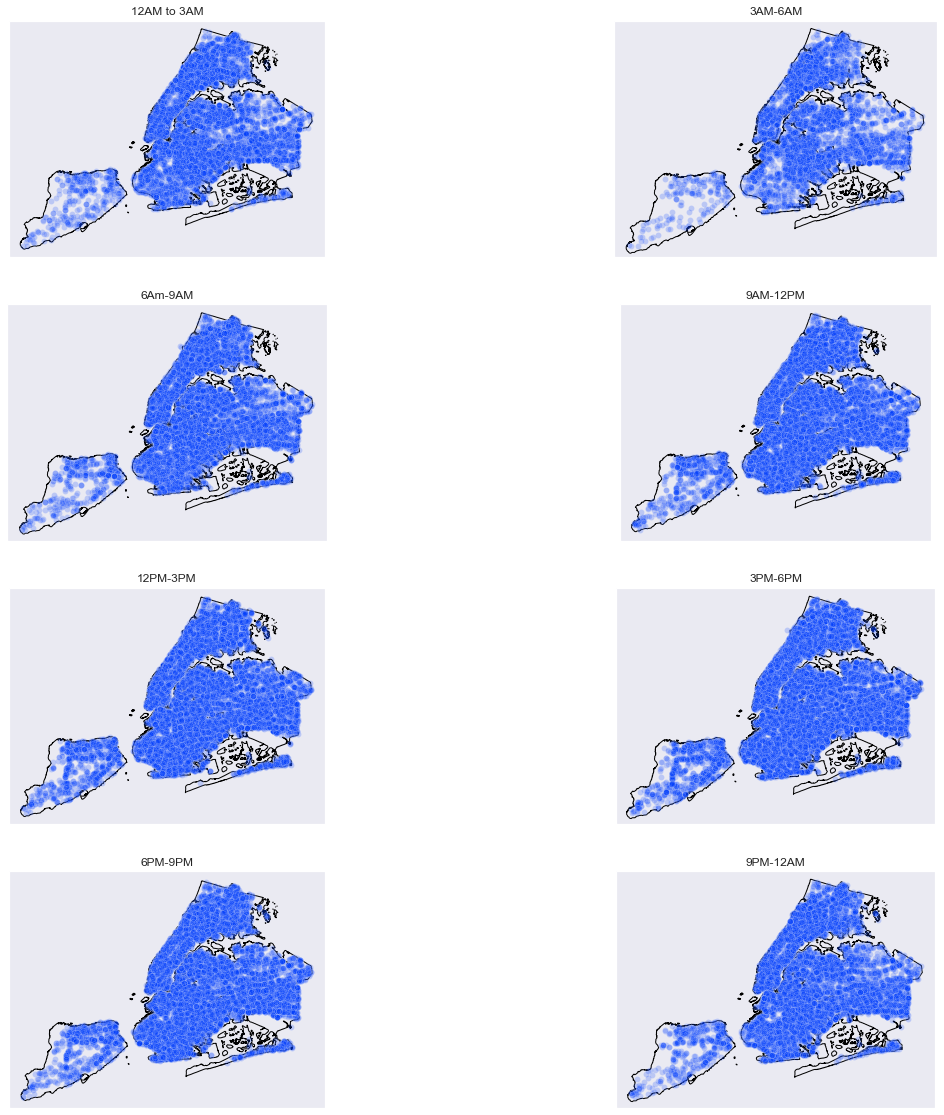

In [11]:
%%capture --no-display
nyc_crash_2021.hour3 = np.trunc(nyc_crash_2021.Hour/3)
nyc_crash_2021[nyc_crash_2021.LONGITUDE == 0] = np.nan

map_titles=["12AM to 3AM", "3AM-6AM", "6Am-9AM", "9AM-12PM", 
            "12PM-3PM", "3PM-6PM", "6PM-9PM", "9PM-12AM"]

fig, axs = plt.subplots(ncols=2, nrows=4, 
                        figsize=(20, 20),
                       subplot_kw={'projection': ccrs.PlateCarree()})

for row in range(4):
    for col in range(2):
        i = 2 * row + col
        df = nyc_crash_2021[nyc_crash_2021.hour3 == i]
        axs[row,col].add_feature(GEOM, facecolor='none', 
                     edgecolor='black')
        sns.scatterplot(x="LONGITUDE", y="LATITUDE", 
                data=df, ax=axs[row,col], alpha=.2)
        axs[row,col].set_title(map_titles[i])

Now we'll create a simple plot showing the distribution of the number of vehicles involved in each crash. We'll need to make 
sure that we deal with any missing values accordingly, as each crash should involve at least one vehicle given what the 
dataset is supposed to represent.

In [11]:
contributing_factors = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                        'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                        'CONTRIBUTING FACTOR VEHICLE 5']

## Calculate number of vehicles involved in each crash
nyc_crash_2021['Vehicles involved'] = len(nyc_crash_2021[contributing_factors].columns) - nyc_crash_2021[
                                          contributing_factors].isnull().sum(axis = 1)

## Drop missing values from 'CONTRIBUTING FACTOR VEHICLE 1'
nyc_crash_2021.dropna(subset = ['CONTRIBUTING FACTOR VEHICLE 1'], inplace = True)

Text(0.5, 1.0, 'Number of Vehicles Involved in Each Crash')

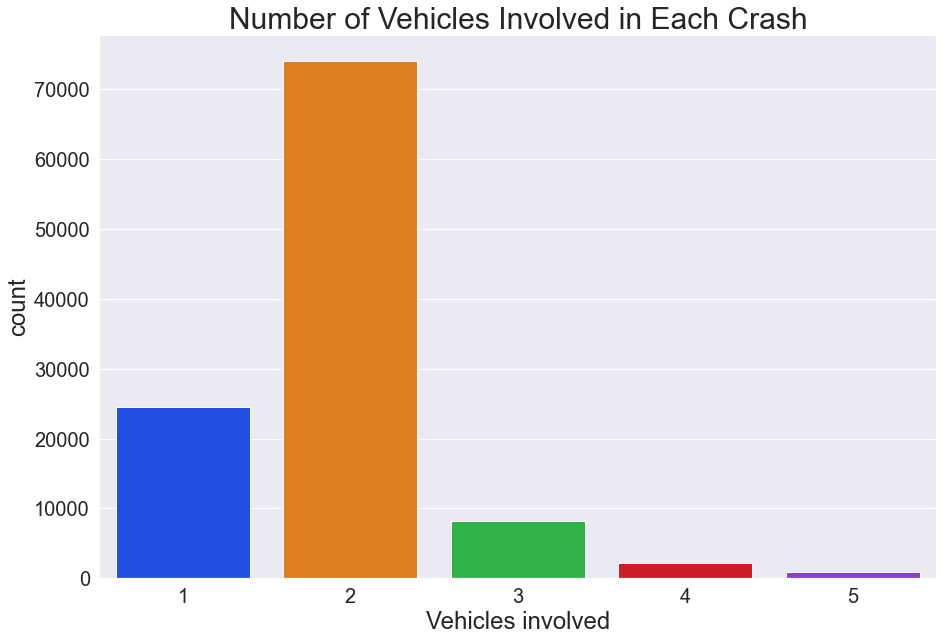

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Vehicles involved', data = nyc_crash_2021)
plt.title('Number of Vehicles Involved in Each Crash', fontsize = 30)

Looking at our plot, the vast majority of vehicle crashes involved exactly two vehicles, with over 70,000 instances. This 
could mean that many of these crashes were direct collisions of vehicles with one another. We can also see that a lot of the
remaining crashes were single vehicle crashes, where vehicles may have crashed into stationary objects, such as telephone poles,
street lamps, roadblocks, etc. There are a few crashes involving three vehicles, and even fewer involving four or more vehicles.